<a href="https://colab.research.google.com/github/JakubDemeszko/ML_Course/blob/main/Data_Visualization/seaborn01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(0, 20, 100)
y = np.random.randn(100, 4)
y = np.cumsum(y, axis = 0)

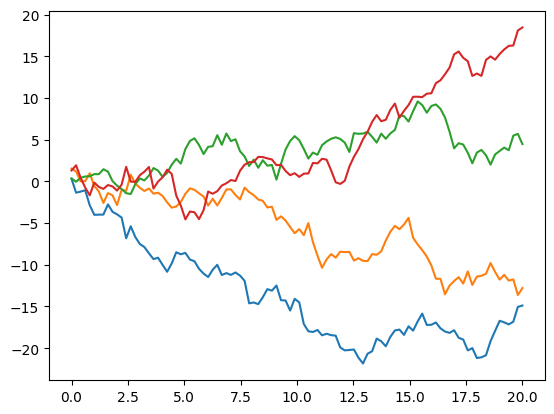

In [3]:
plt.plot(x, y)

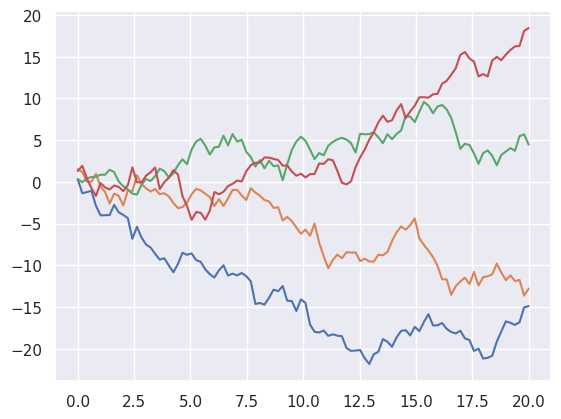

In [4]:
# Creating a basing chart with using random generated data and seaborn library
sns.set()
plt.plot(x, y)

In [5]:
# Loading data from Seaborn
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Checking the basic info about DF.
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


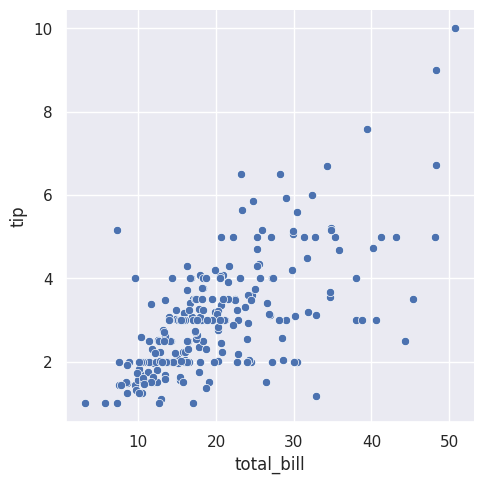

In [7]:
# Looking for the relation between 2 columns
sns.relplot(data = df, x = 'total_bill', y = 'tip')

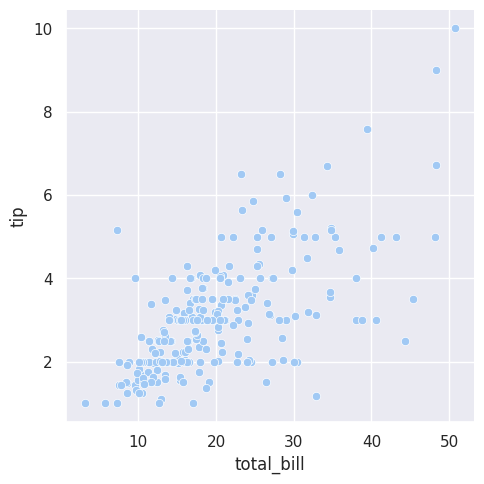

In [8]:
# Changing the style of the Chart
sns.set(palette = 'pastel', font_scale = 1)
sns.relplot(data = df, x = 'total_bill', y = 'tip')

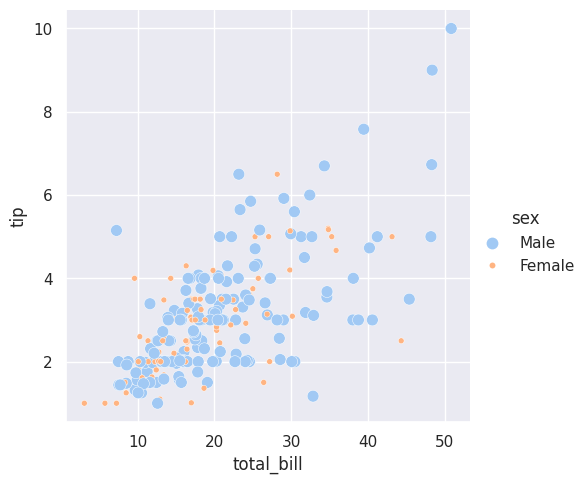

In [9]:
# Checking the same data groupped by the particular column, changing the size
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex', size = 'sex')

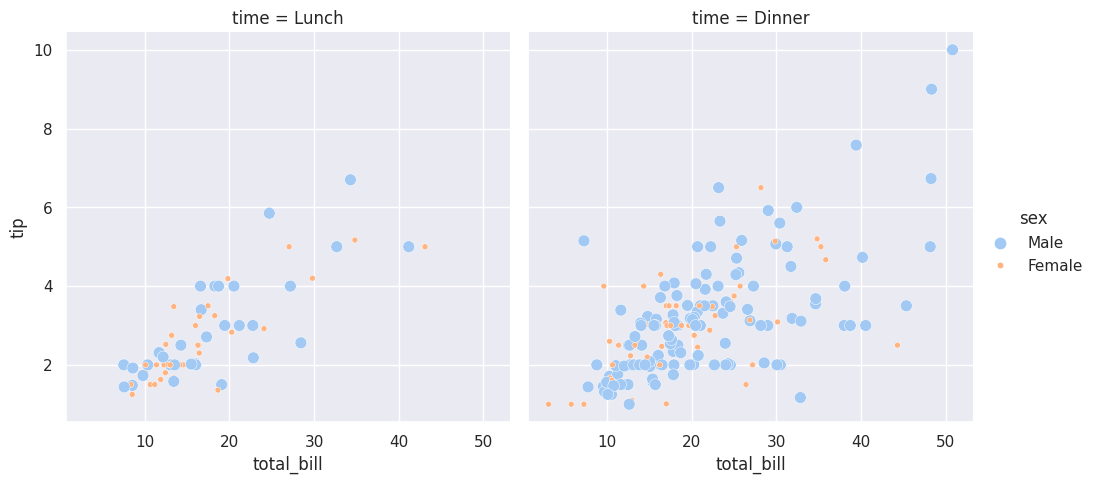

In [10]:
# Making the same chart with the split by particular col
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex', size = 'sex',
            col = 'time')

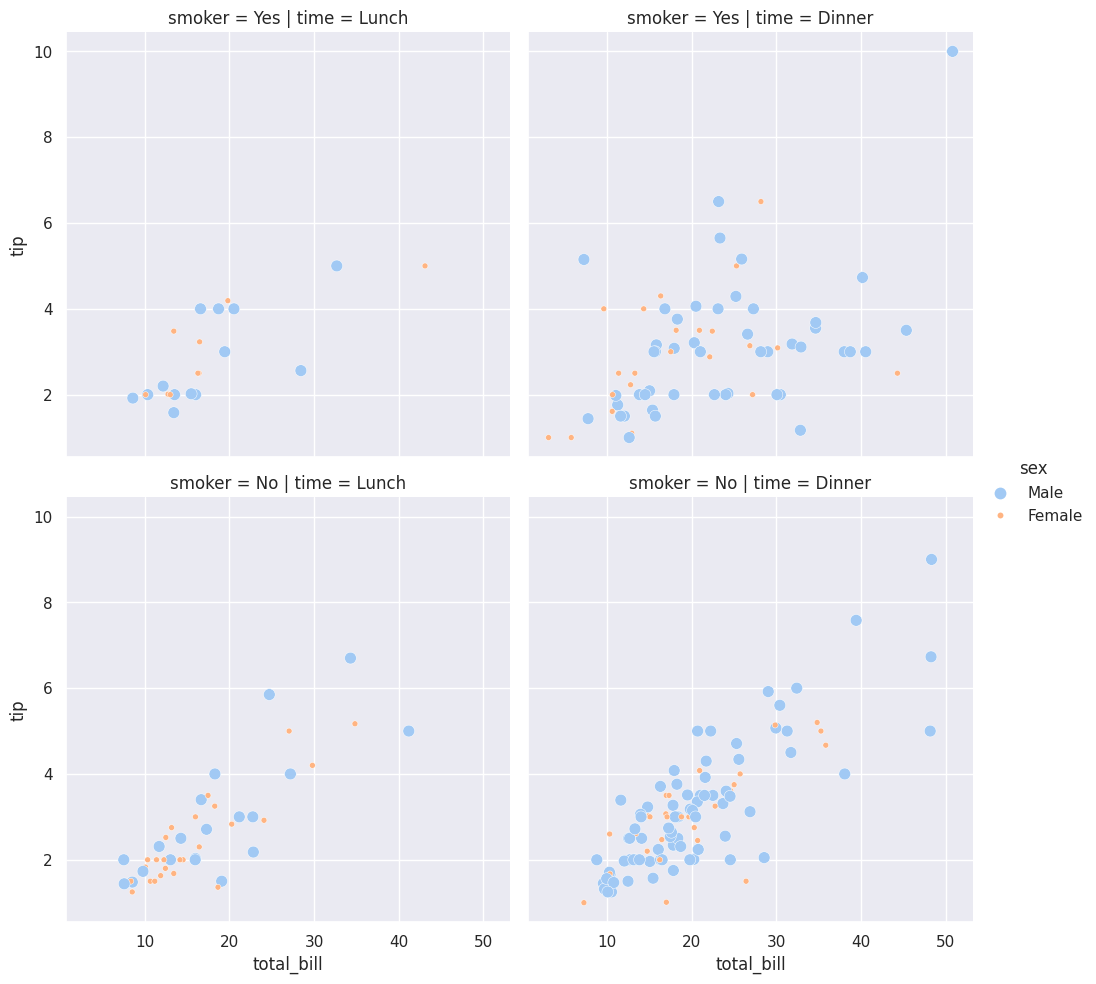

In [11]:
# Making the field of charts with base on particular cols, rows
sns.relplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex', size = 'sex',
            col = 'time', row = 'smoker')

In [12]:
# Reading another DF
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


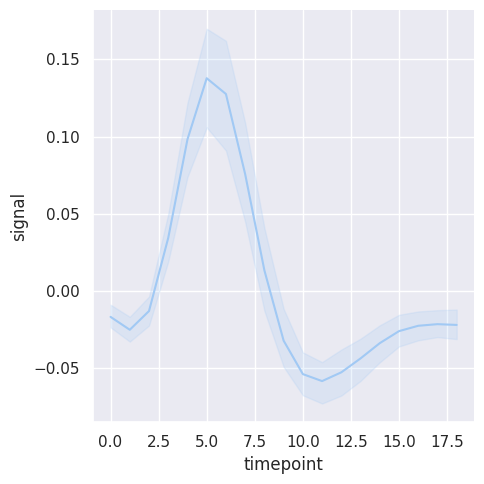

In [13]:
sns.relplot(data = df, x = 'timepoint', y = 'signal', kind = 'line')

In [14]:
df.timepoint.value_counts()

18    56
10    56
4     56
5     56
6     56
2     56
8     56
7     56
3     56
11    56
14    56
12    56
13    56
0     56
15    56
16    56
9     56
17    56
1     56
Name: timepoint, dtype: int64

<ipython-input-15-95212e0a7b9b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('timepoint').agg('mean').plot()


<Axes: xlabel='timepoint'>

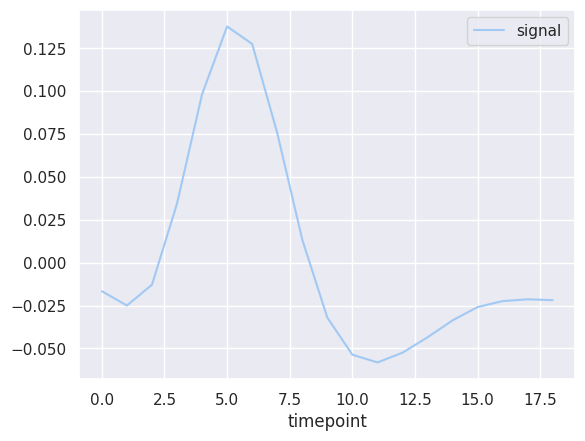

In [15]:
# Grouping the Timepoint by the Mean of the Signal
df.groupby('timepoint').agg('mean').plot()

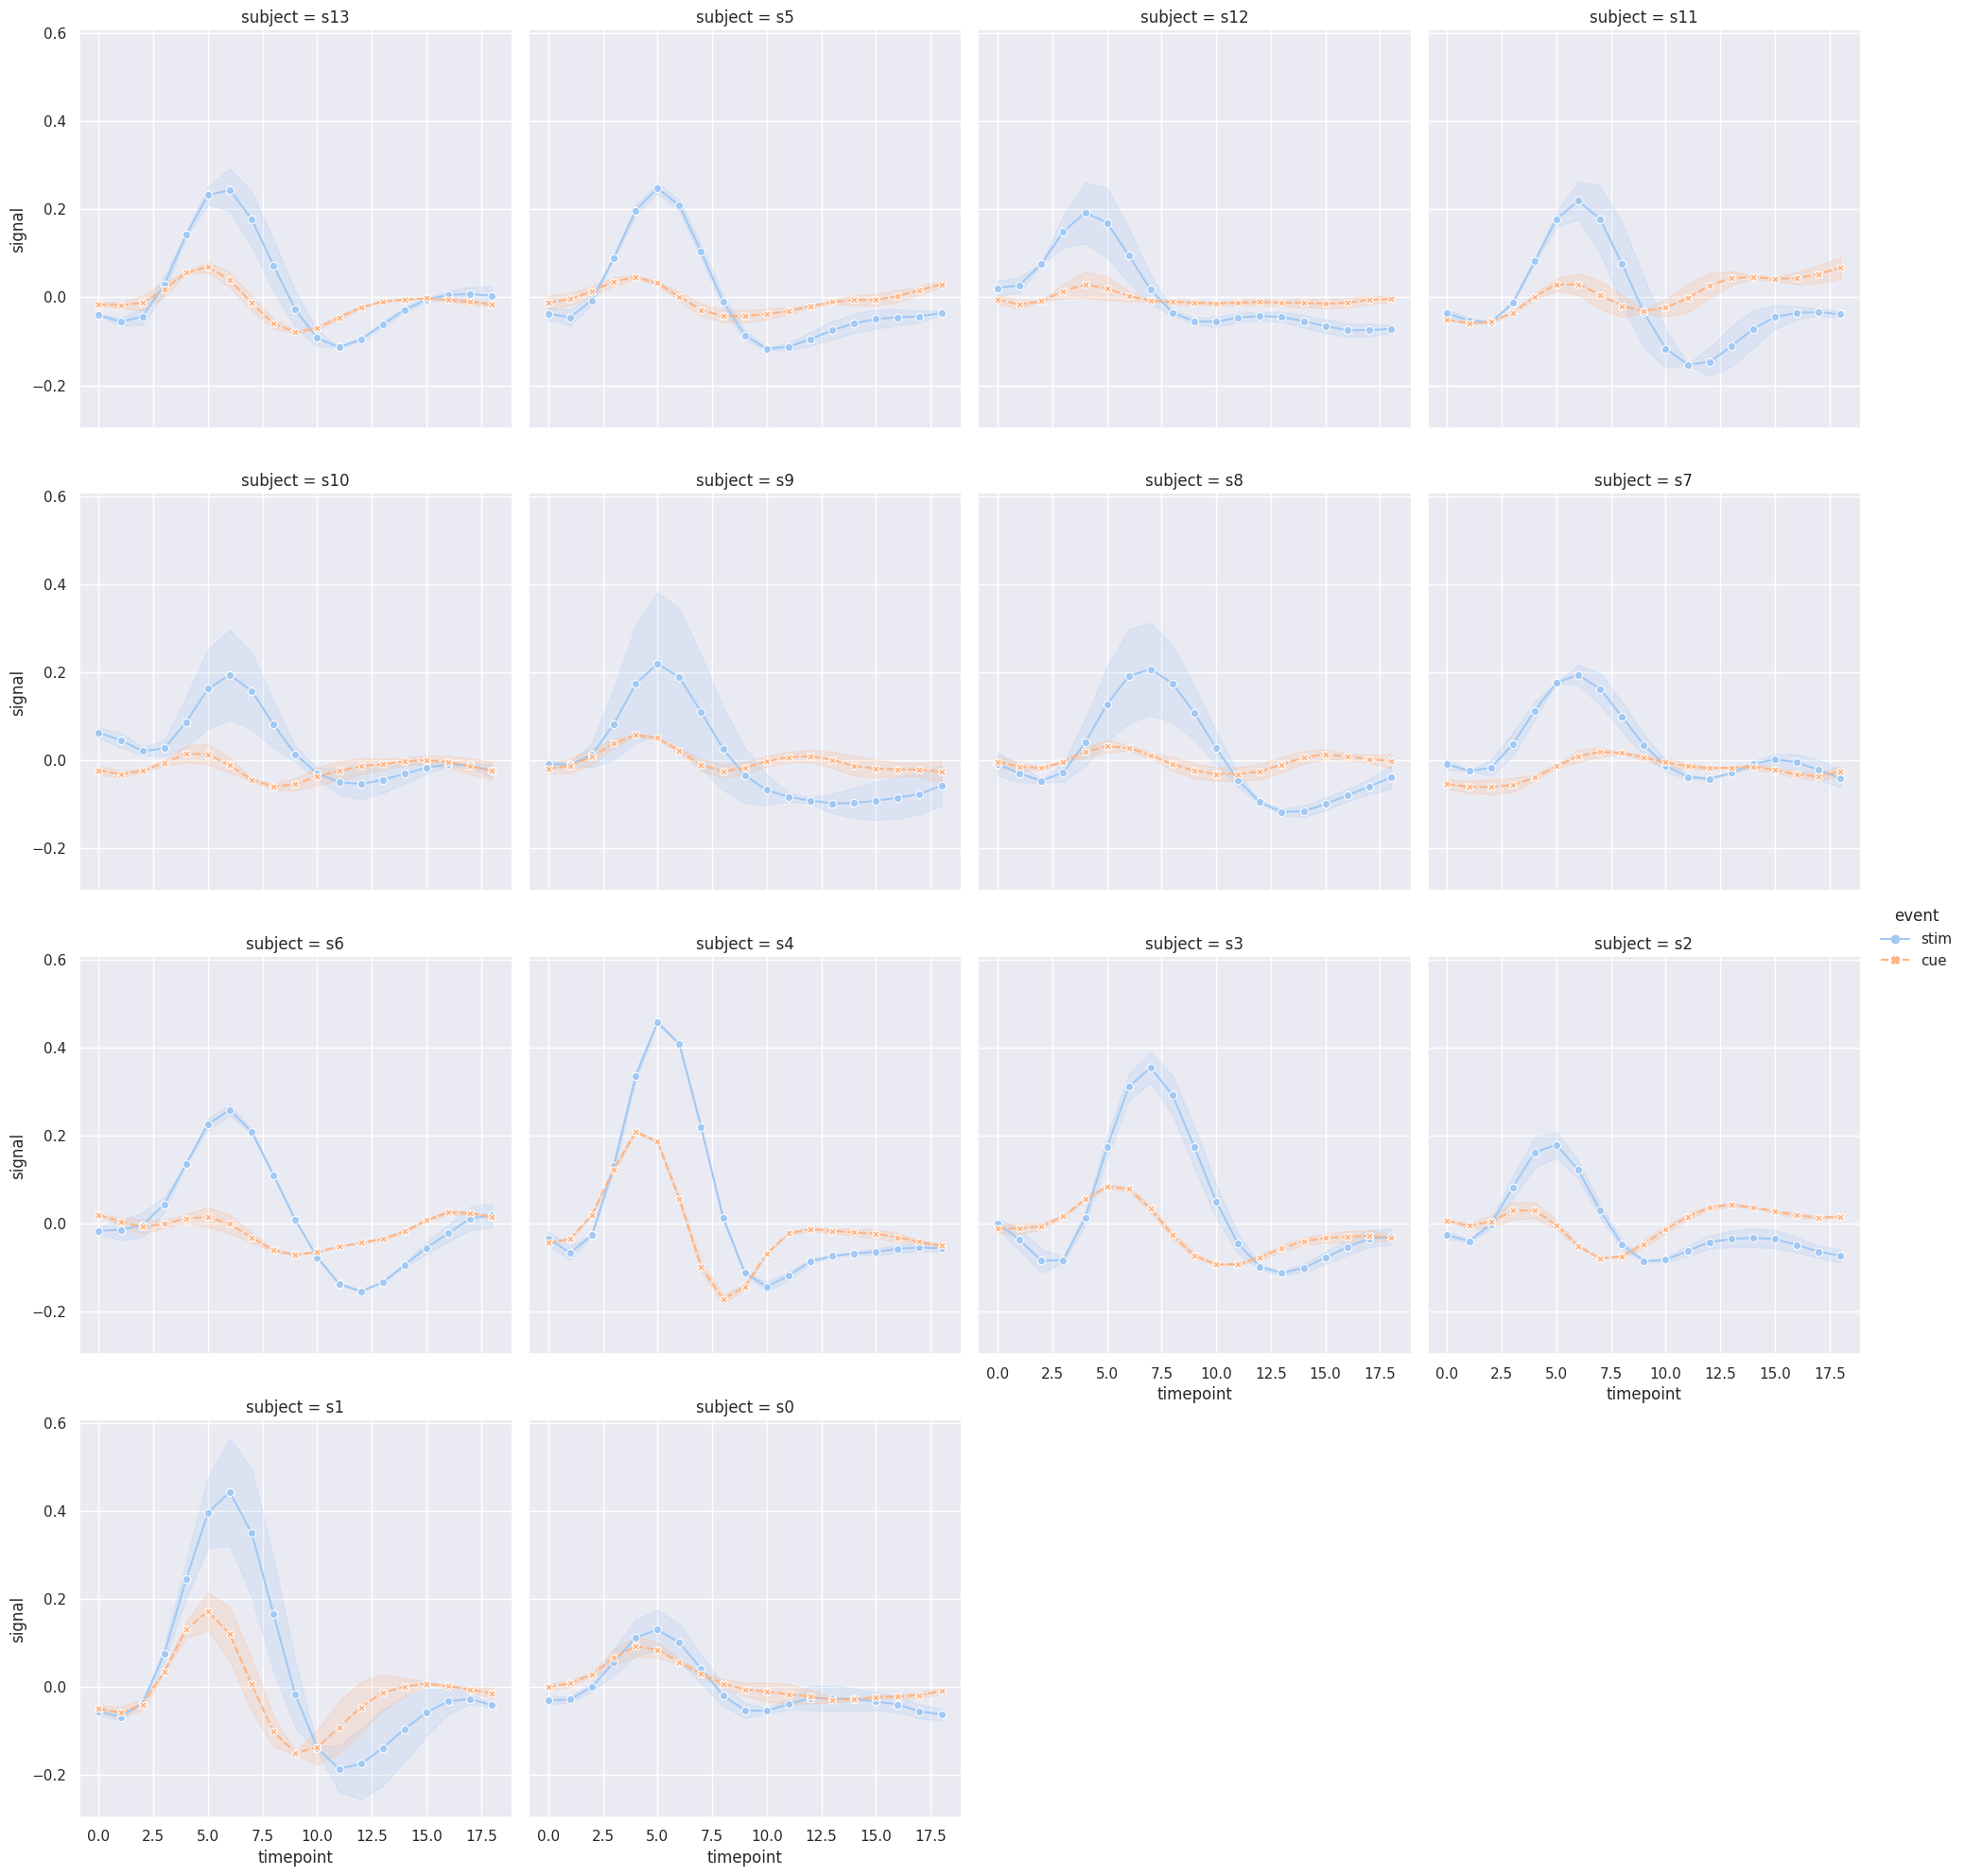

In [16]:
# Creating a plot with using of the col_wrap to wrap the columns based on subject.
sns.relplot(data = df, x = 'timepoint', y = 'signal', hue = 'event', kind = 'line',
            style = 'event', markers = True, col = 'subject', col_wrap = 4)

In [17]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


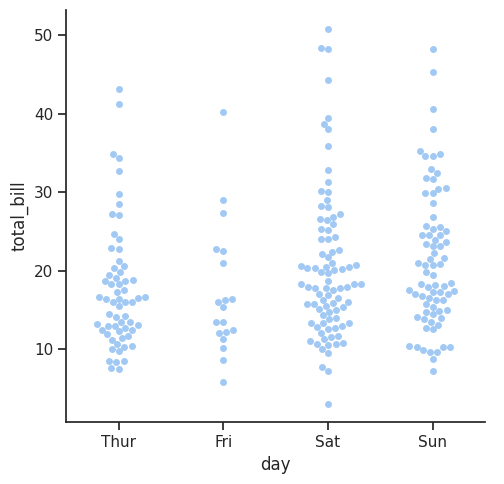

In [18]:
# Creating the chart for the categories
sns.set(style = 'ticks', palette = 'pastel')
sns.catplot(data = df, x = 'day', y = 'total_bill', kind = 'swarm')

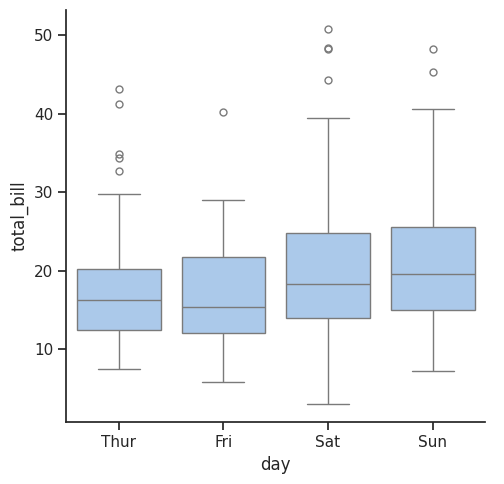

In [19]:
# Adding the chart box type which provide min, max, quarter and median details
sns.catplot(data = df, x = 'day', y = 'total_bill', kind = 'box')

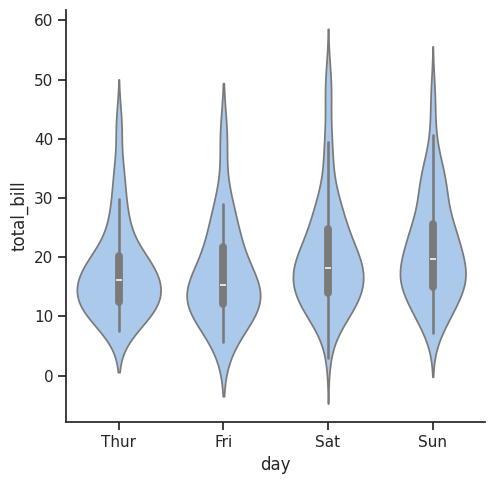

In [20]:
# Creating the violin chart
sns.catplot(data = df, x = 'day', y = 'total_bill', kind = 'violin')

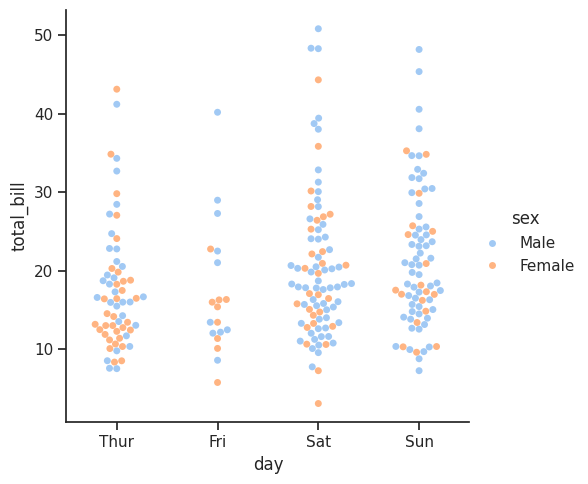

In [21]:
# Checking the data based on the sex
sns.catplot(data = df, x = 'day', y = 'total_bill', kind = 'swarm', hue = 'sex')

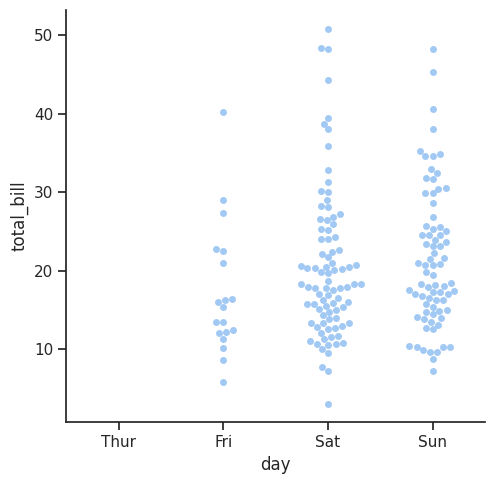

In [22]:
# Cutting off particular data by using query.
sns.catplot(data = df.query("day == ['Fri', 'Sat', 'Sun']"), x = 'day', y = 'total_bill', kind = 'swarm')

In [23]:
# Loading another data set
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


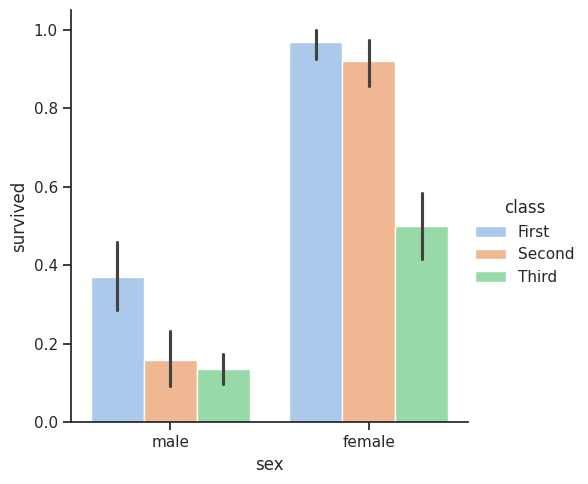

In [24]:
# Checking the surviving data
sns.catplot(data = df, x = 'sex', y ='survived', kind = 'bar', hue = 'class')

In [25]:
# Generation of the data
sns.set(style = 'darkgrid')

df = np.random.multivariate_normal(mean=[0,1], cov = [(1, -0.4), (-0.4, 1)], size = 10000)
df = pd.DataFrame(df, columns = ['x', 'y'])
df.head()

,x,y
0,-1.958646,1.906678
1,0.103230,0.619885
2,0.797743,2.177166
3,1.485683,0.258593
4,0.040705,1.521642


In [26]:
df.describe()

,x,y
count,10000.000000,10000.000000
mean,0.013827,1.011263
std,1.005281,1.004772
min,-4.116849,-2.527042
25%,-0.662987,0.330881
50%,0.017414,1.006375
75%,0.687489,1.698609
max,3.579678,4.938490


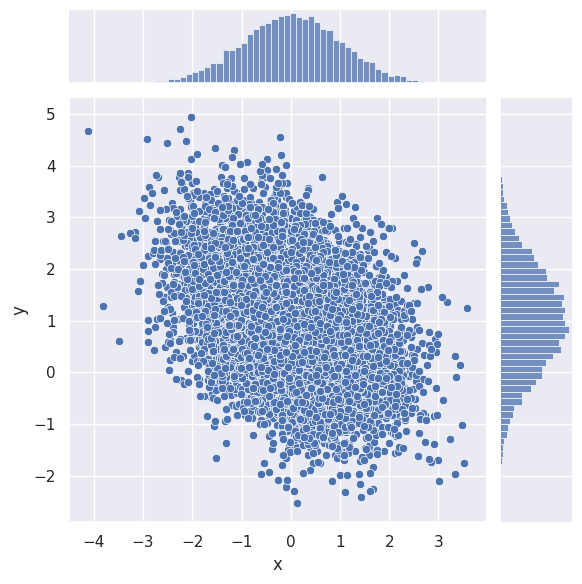

In [27]:
# Creating the jointplot
sns.jointplot(data = df, x = 'x', y = 'y')

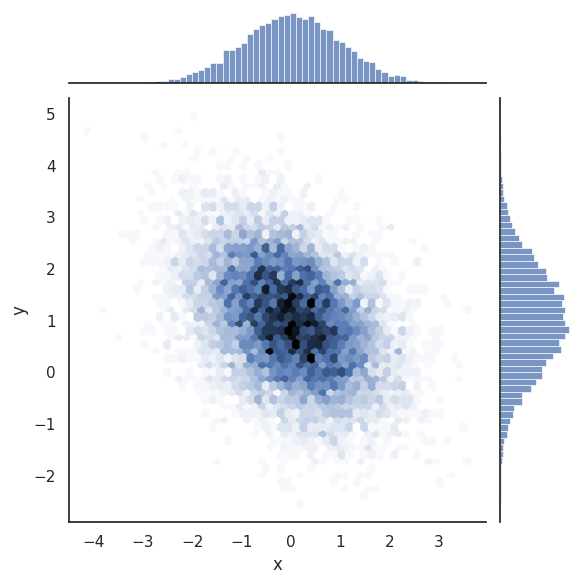

In [28]:
sns.set(style = 'white')
sns.jointplot(data = df, x = 'x', y = 'y', kind = 'hex')

In [29]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


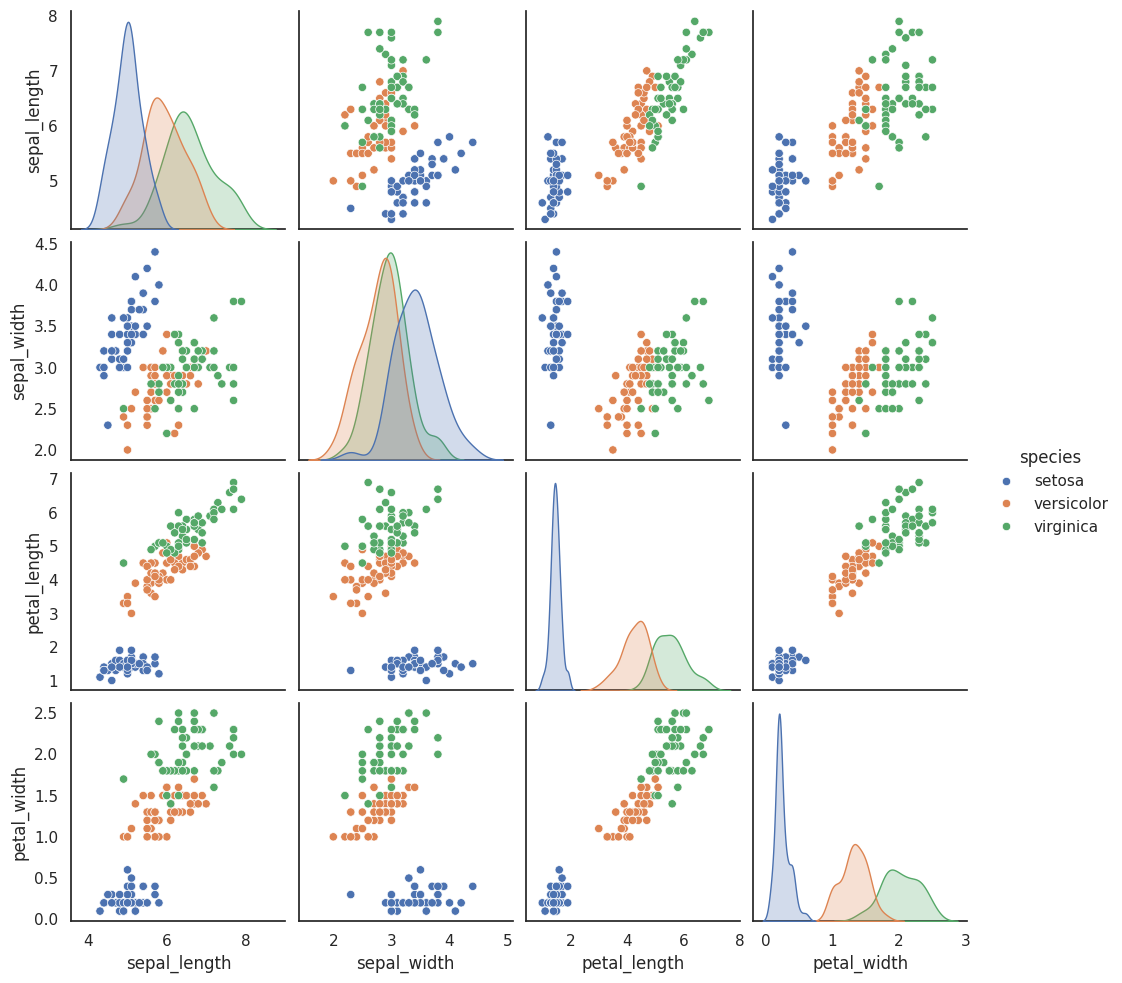

In [31]:
sns.pairplot(data = df, hue = 'species')

In [32]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

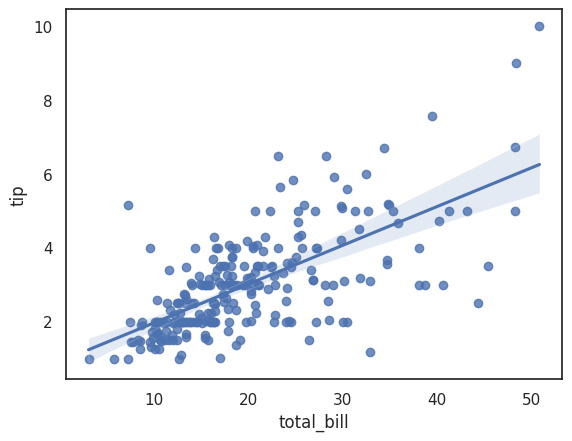

In [33]:
# Making the linear regression for 2 data
sns.regplot(data = df, x = 'total_bill', y = 'tip')